# Laboratorium 2: ewaluacja metod uczenia maszynowego

W ramach laboratorium omówiona zostanie ewaluacja metod uczenia maszynowego ze szczególnym uwzględnieniem problemu regresji.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

boston = datasets.load_boston()
print(boston.DESCR)

print("boston (shape): ", boston.data.shape)

print(boston.target)

# Wycinamy kawałek danych do testów:

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=421, shuffle=True)

print(X_train.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X_train

array([[6.14700e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.96900e+02, 7.60000e+00],
       [2.11240e-01, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
        3.86630e+02, 2.99300e+01],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       ...,
       [6.07600e-02, 0.00000e+00, 1.19300e+01, ..., 2.10000e+01,
        3.96900e+02, 5.64000e+00],
       [4.98100e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.96900e+02, 8.43000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.18000e+00]])

## Regresja liniowa

Przejrzyj poniższy kod.
Policz współczynniki $R^2$ na zbiorze testowym i treningowym.
Jak się je interpretuje? Który powinien być większy?
Policz też błędy średniokwadratowe.

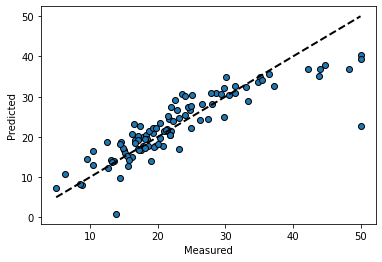

MSE train:  21.907706593780187
MSE test:   22.55176602687942
R2 train:  0.7334972975111719
R2 test:   0.7577881611199544


In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

def evaluate_reg(reg):
  pred_test = reg.predict(X_test)

  fig, ax = plt.subplots()
  ax.scatter(y_test, pred_test, edgecolors=(0, 0, 0))
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  plt.show()

  ## solution 

  print("MSE train: ", mean_squared_error(y_train, reg.predict(X_train)))
  print("MSE test:  ", mean_squared_error(y_test, reg.predict(X_test)))

evaluate_reg(lr)

## solution

print("R2 train: ", lr.score(X_train, y_train))
print("R2 test:  ", lr.score(X_test, y_test))


## Ridge regression

Przeprowadź analogiczną procedurę jak w poprzednim punkcie, ale z wykorzystaniem *Ridge regression*.
Sprawdź, które współczynniki regresji są równe zero. Co to oznacza? Jakim parametrom w danych odpowiadają te cechy?

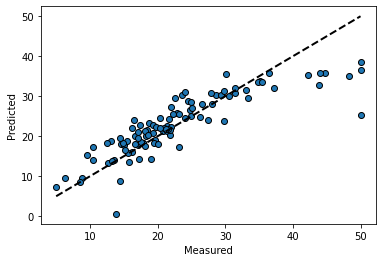

MSE train:  24.251070206232697
MSE test:   25.30663518784275
Params:  [-0.04978535  0.03992148 -0.01018163  0.         -0.          2.48781338
  0.00788664 -0.79666863  0.21500793 -0.01328535 -0.82312589  0.00910398
 -0.6461811 ]
Intercept:  32.74547531916387
R2 train:  0.7049907656677208
R2 test:   0.7282001490522721


In [5]:
from sklearn import linear_model

reg_ridge = linear_model.Ridge(alpha=1)
reg_lasso = linear_model.Lasso(alpha=0.5)

reg = reg_lasso

reg.fit(X_train, y_train)
evaluate_reg(reg)
print("Params: ", reg.coef_)
print("Intercept: ", reg.intercept_)

## solution 
print("R2 train: ", reg.score(X_train, y_train))
print("R2 test:  ", reg.score(X_test, y_test))

## Drzewa regresji

Dopasuj kilkukrotnie model drzewa regresji. W jakim zakresie zmienia się błąd na zbiorze treningowym?

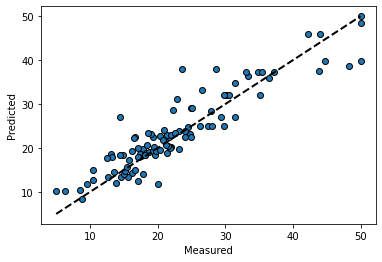

MSE train:  0.0
MSE test:   15.435882352941176


In [6]:
from sklearn import tree

reg = tree.DecisionTreeRegressor()

reg.fit(X_train, y_train)

evaluate_reg(reg)

## Walidacja krzyżowa

Zaobserwuj stabilność średniej z MSE przy wykorzystaniu walidacji krzyżowej.
Dopisz sprawdzanie błędów poszczególnych metod regresji na zbiorze testowym (normalnie tego się **nie** robi -- to jest tylko dla celów poglądowych). Zastanów się skąd może brać się różnica.

Porównaj wyniki dla drzew regresji i metody Lasso z wcześniejszego zadania.

In [10]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

errors_resub = []
errors_valid = []
errors_test = []
for train_idx, valid_idx in kf.split(X_train):
  X_t_f, X_v_f = X_train[train_idx], X_train[valid_idx]
  y_t_f, y_v_f = y_train[train_idx], y_train[valid_idx]

  #reg = tree.DecisionTreeRegressor()
  reg = linear_model.Lasso(alpha=0.5)
  reg.fit(X_t_f, y_t_f)
  errors_resub.append(mean_squared_error(y_t_f, reg.predict(X_t_f)))
  errors_valid.append(mean_squared_error(y_v_f, reg.predict(X_v_f)))
  errors_test.append(mean_squared_error(y_test, reg.predict(X_test)))


print(sum(errors_resub)/kf.n_splits)
print(sum(errors_valid)/kf.n_splits)
print(sum(errors_test)/kf.n_splits)


24.142689422833705
26.35728329522568
25.47849571563674


## Optymalizacja parametrów

Z użyciem walidacji krzyżowej.

Znajdź optymalną wartość parametru `alpha` dla metody Lasso.

Następnie znajdź optymalne parametry dla metody `DecisionTreeRegressor` (na przykład `max_depth`, `min_samples_leaf`). Spróbuj zmodyfikować także inne parametry i sprawdź rezultaty.

Napisz własną funkcję oceniającą model regresji tak, aby premiowała małe drzewa. Ile minimum węzłów w drzewie potrzebujesz aby MSE na zbiorze testowym było mniejsze niż 15?

{'alpha': 0.1}
MSE train:  22.896070980524588
MSE test:   24.00514346171196
{'max_depth': None, 'min_samples_leaf': 4}
MSE train:  4.983977133427628
MSE test:   12.372781191921211
Nodes:  165


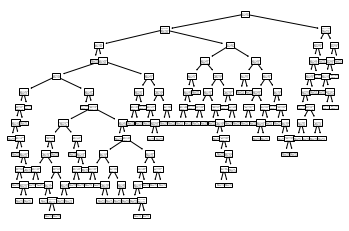

In [8]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 0.5 , 1.0, 5.0, 10.0]}
lasso_reg = linear_model.Lasso()
gcv_reg = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error')
gcv_reg.fit(X_train, y_train)
print(gcv_reg.best_params_)

print("MSE train: ", mean_squared_error(y_train, gcv_reg.predict(X_train)))
print("MSE test:  ", mean_squared_error(y_test, gcv_reg.predict(X_test)))

grid_tree = {'max_depth': [1, 2, 3, 4, None], 'min_samples_leaf': [1, 2, 4, 8]}
tree_reg = tree.DecisionTreeRegressor()
gcv_reg = GridSearchCV(tree_reg, grid_tree, scoring='neg_mean_squared_error')
gcv_reg.fit(X_train, y_train)
print(gcv_reg.best_params_)

tree.plot_tree(gcv_reg.best_estimator_)

print("MSE train: ", mean_squared_error(y_train, gcv_reg.predict(X_train)))
print("MSE test:  ", mean_squared_error(y_test, gcv_reg.predict(X_test)))
print("Nodes: ", gcv_reg.best_estimator_.tree_.node_count)